In [197]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score 
from sklearn.metrics import confusion_matrix
#import scikitplot as skplt
plt.rc('figure',figsize=(18,9))
from imblearn.over_sampling import SMOTE

In [198]:
df = pd.read_csv("BankChurners.csv")

In [199]:
df.head(5)
# As it is shown we dont need the last 2 columns for the analysis

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [200]:
# Dataset to use
data = df[df.columns[:-2]]
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


# Explolatory Data Analysis

In [202]:
# Age Bar Chart

In [203]:
age = data["Customer_Age"]

In [204]:
bins = range(20, 100, 10)

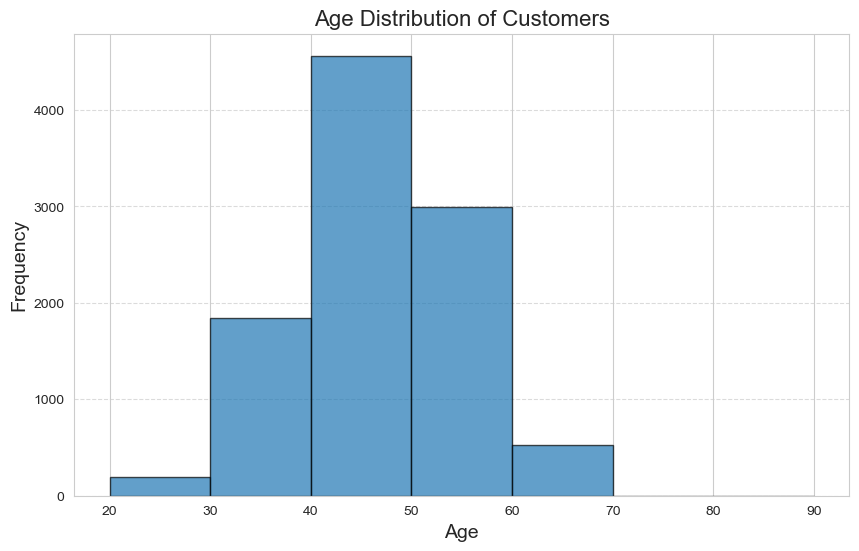

In [205]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(age, bins=bins, edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Customers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# As it is depticted most clients fall in the catefory from 40 till 60 years old and especially between the age of 40-50 are the most clients

In [207]:
# Card Distribution - group the data based on the card category and Gender
card_distribution = data.groupby(['Card_Category', 'Gender']).size().unstack()

In [208]:
# Calculate the percentage for each type whether it is the customer male of female
card_gender = (card_distribution.T / card_distribution.sum(axis=1)).T * 100

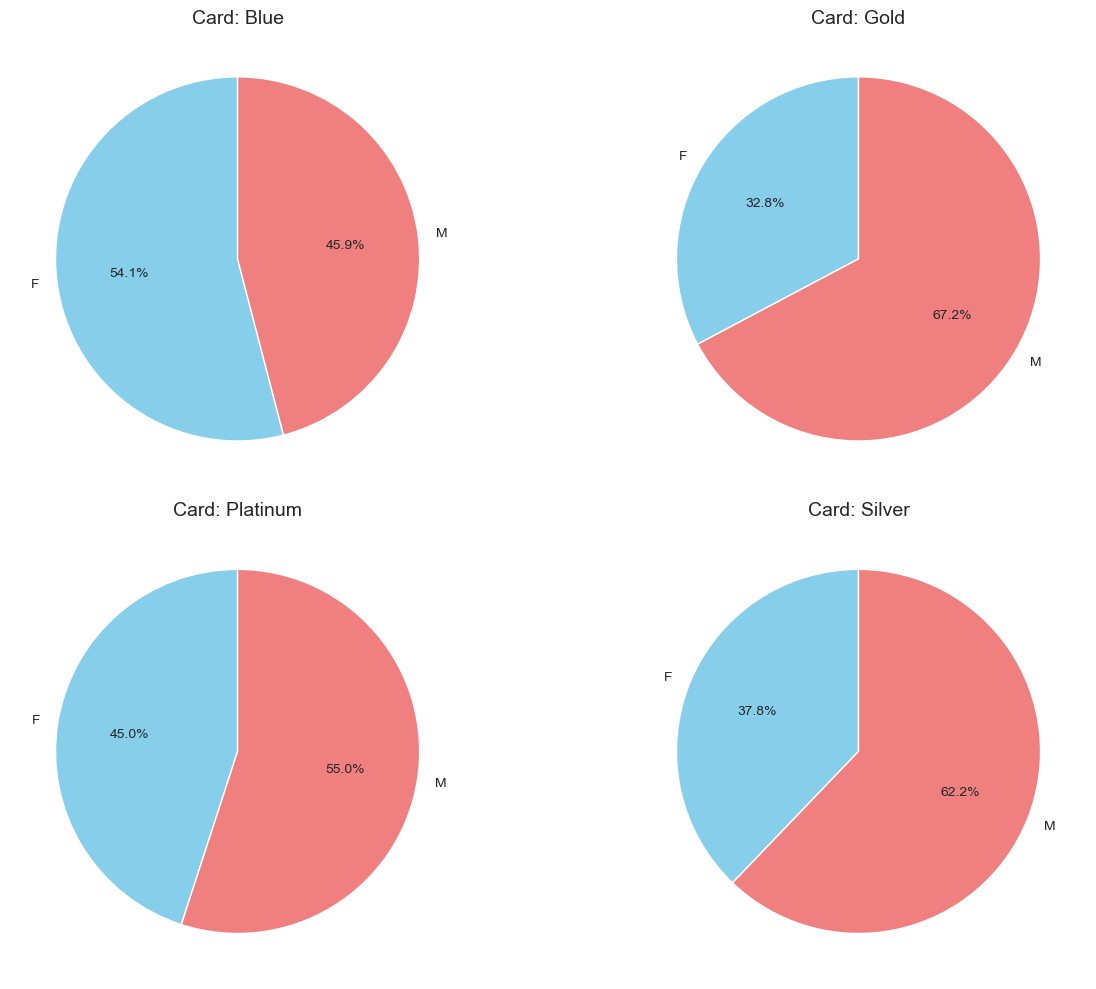

In [209]:
#Pie Chart
# Plot a pie chart for each card category
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Card categories
card_categories = card_gender.index

# Create pie charts for each card category
for i, card in enumerate(card_categories):
    if i < len(axes):
        ax = axes[i]
        card_gender.loc[card].plot.pie(
            autopct='%1.1f%%', ax=ax, startangle=90, labels=card_gender.columns, colors=['skyblue', 'lightcoral']
        )
        ax.set_ylabel('')
        ax.set_title(f"Card: {card}", fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

#### Across all types of cards there is a sligth difference between dender distribution we can see that men have mostly Blue cards but in all other types there are more women

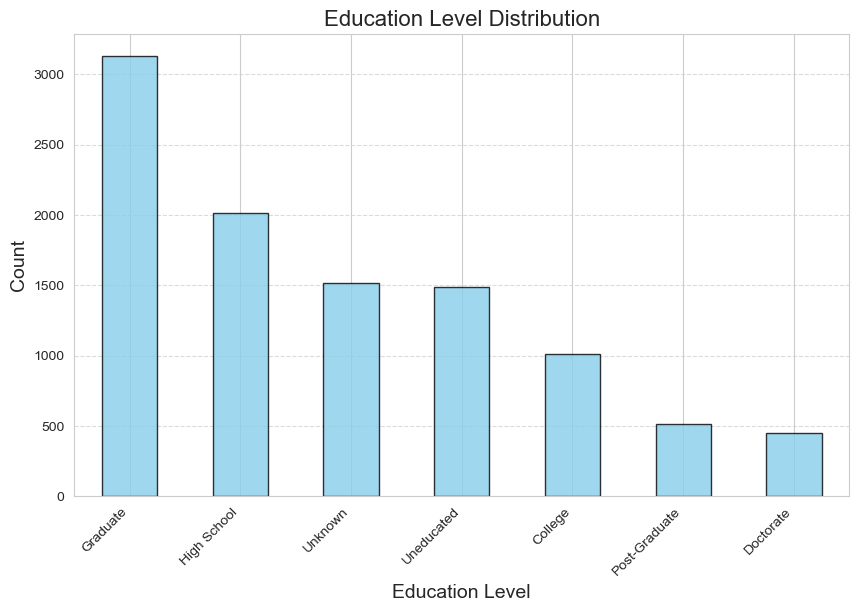

In [211]:
# Count how many people on each education level
counter = data['Education_Level'].value_counts()

plt.figure(figsize=(10, 6))
counter.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Education Level Distribution', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## As it is depicted we can clearly see that most of our clients have graduated and have at least a level of formal education.

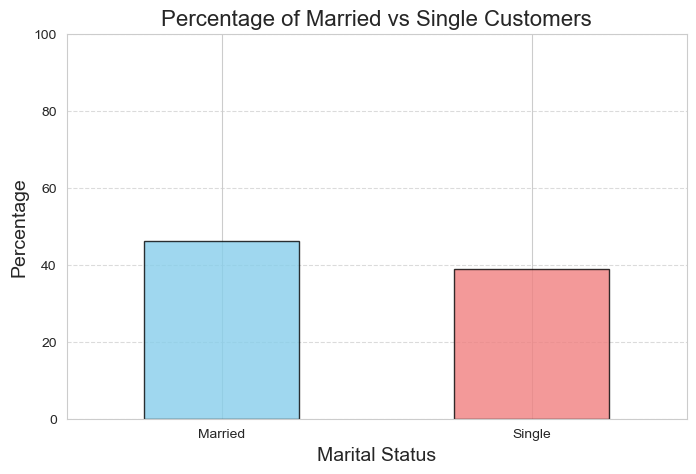

In [213]:
# Marital Status
counter = data['Marital_Status'].value_counts()
marital_status = (counter / counter.sum()) * 100

plt.figure(figsize=(8, 5))
marital_status[['Married', 'Single']].plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black', alpha=0.8)
plt.title('Percentage of Married vs Single Customers', fontsize=16)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## It is clearly depicted that in the Dataset we have more Married than Single customer

In [215]:
income_levels = {
    'Less than $40K': 20,
    '$40K - $60K': 50,
    '$60K - $80K': 70,
    '$80K - $120K': 100,
    '$120K +': 140,
    'Unknown': None
}

In [216]:
data['Income_Numeric'] = data['Income_Category'].map(income_levels)

In [217]:
# Bin the income levels
bins = [0, 20, 40, 60, 80, 100, 140]
labels = ['<20', '20-40', '40-60', '60-80', '80-100', '100+']
data['Income_Binned'] = pd.cut(data['Income_Numeric'], bins=bins, labels=labels, right=False)


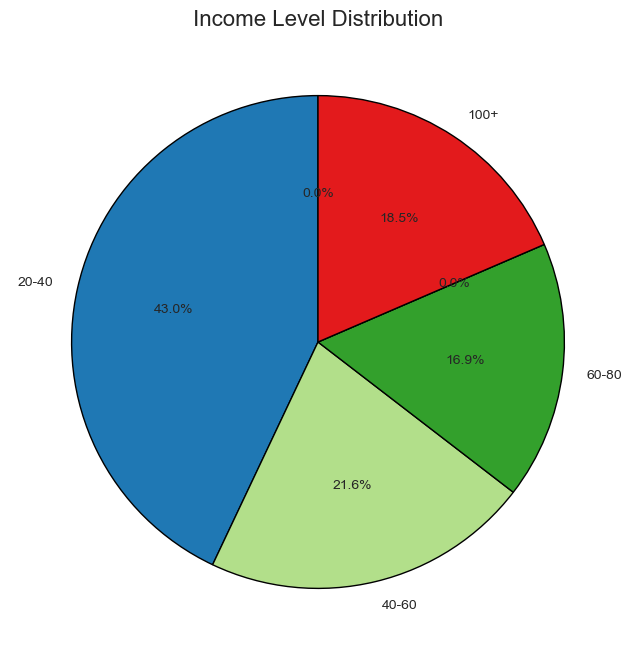

In [218]:
# Pie Chart
bin_counts = data['Income_Binned'].value_counts(sort=False)
plt.figure(figsize=(8, 8))
bin_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, wedgeprops=dict(edgecolor='black'))
plt.title('Income Level Distribution', fontsize=16)
plt.ylabel('')  # Remove the y-axis label
plt.show()

## 43 percent of our clients fall for the category of 20-40 thousand

# Different Card Categories

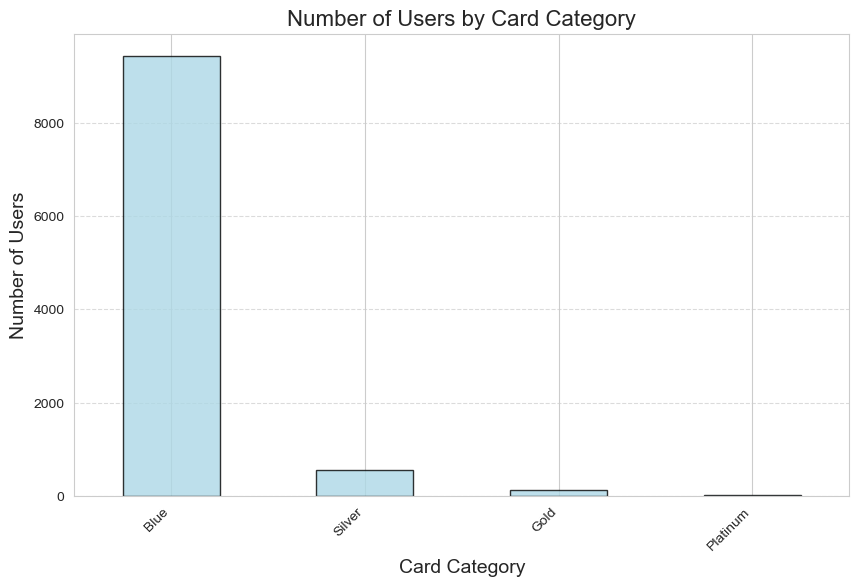

In [221]:
counter = data['Card_Category'].value_counts()
plt.figure(figsize=(10, 6))
counter.plot(kind='bar', color='lightblue', edgecolor='black', alpha=0.8)
plt.title('Number of Users by Card Category', fontsize=16)
plt.xlabel('Card Category', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### As we could see more people use Blue cards

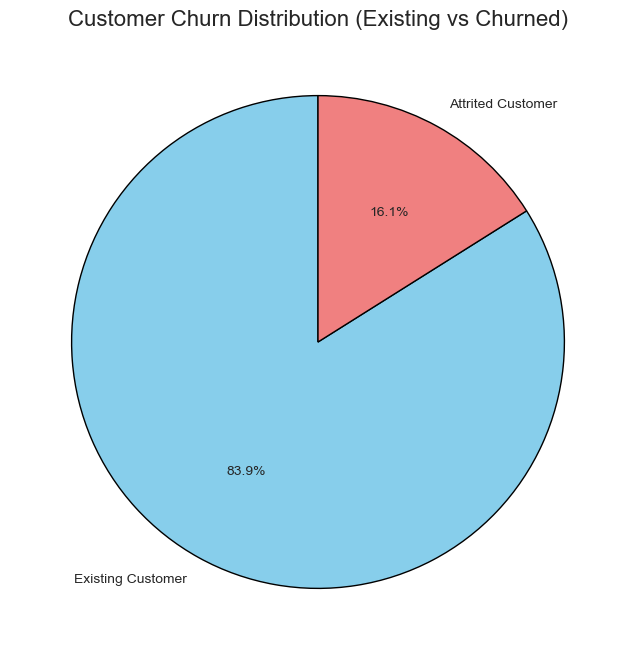

In [223]:
# Counter of Customers 
counter = data['Attrition_Flag'].value_counts()

plt.figure(figsize=(8, 8))
counter.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'], wedgeprops=dict(edgecolor='black'))
plt.title('Customer Churn Distribution (Existing vs Churned)', fontsize=16)
plt.ylabel('')  # Remove the y-axis label
plt.show()

### In this dataset more customers are existing than staying

# Data Preprocessing

In [226]:
data_processed = df[df.columns[:-2]]
data_processed
data_processed['Attrition_Flag'] = data_processed['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})
data_processed['Gender'] = data_processed['Gender'].map({'F': 1, 'M': 0})
categorical_columns = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category']
data_processed = pd.get_dummies(data_processed, columns=categorical_columns, drop_first=True)
columns_to_drop = ['CLIENTNUM']
data_processed.drop(columns=columns_to_drop, inplace=True)

In [227]:
data_processed

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,0,3,39,5,1,3,12691.0,777,...,True,False,False,False,True,False,False,False,False,False
1,0,49,1,5,44,6,1,2,8256.0,864,...,False,False,True,False,False,True,False,False,False,False
2,0,51,0,3,36,4,1,0,3418.0,0,...,False,True,False,False,True,False,False,False,False,False
3,0,40,1,4,34,3,4,1,3313.0,2517,...,False,False,True,False,False,False,True,False,False,False
4,0,40,0,3,21,5,1,0,4716.0,0,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,40,3,2,3,4003.0,1851,...,False,False,False,False,False,True,False,False,False,False
10123,1,41,0,2,25,4,2,3,4277.0,2186,...,False,False,False,False,False,False,False,False,False,False
10124,1,44,1,1,36,5,3,4,5409.0,0,...,False,False,True,False,True,False,False,False,False,False
10125,1,30,0,2,36,4,3,3,5281.0,0,...,False,False,False,False,False,False,True,False,False,False


## Data Unsampling Using SMOTE

In [229]:
over_sampler = SMOTE()
X, y = over_sampler.fit_resample(data_processed.drop(columns=['Attrition_Flag']), data_processed['Attrition_Flag'])

In [230]:
upsampled_df = X.copy()
upsampled_df['Churn'] = y

In [231]:
data_from_smote = upsampled_df[upsampled_df.columns[15:-1]].copy()
upsampled_df = upsampled_df.drop(columns=upsampled_df.columns[15:-1])

# Principal Component Analysis

## We will use principal component analysis to reduce the dimensionality of the one-hot encoded categorical variables losing some of the variances, but simultaneously, using a couple of principal components instead of tens of one-hot encoded features will help me construct a better model.



In [234]:
N_COMPONENTS = 4

pca_model = PCA(n_components = N_COMPONENTS )

pc_matrix = pca_model.fit_transform(data_from_smote)

evr = pca_model.explained_variance_ratio_
total_var = evr.sum() * 100
cumsum_evr = np.cumsum(evr)

trace1 = {
    "name": "individual explained variance", 
    "type": "bar", 
    'y':evr}
trace2 = {
    "name": "cumulative explained variance", 
    "type": "scatter", 
     'y':cumsum_evr}
data = [trace1, trace2]
layout = {
    "xaxis": {"title": "Principal components"}, 
    "yaxis": {"title": "Explained variance ratio"},
  }
fig = go.Figure(data=data, layout=layout)
fig.update_layout(     title='Explained Variance Using {} Dimensions'.format(N_COMPONENTS))
fig.show()

In [235]:
usampled_df_with_pcs = pd.concat([upsampled_df,pd.DataFrame(pc_matrix,columns=['PC-{}'.format(i) for i in range(0,N_COMPONENTS)])],axis=1)
usampled_df_with_pcs

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn,PC-0,PC-1,PC-2,PC-3
0,45,0,3,39,5,1,3,12691.000000,777,11914.000000,1.335000,1144,42,1.625000,0.061000,0,-0.738563,-0.688043,-0.257700,0.614687
1,49,1,5,44,6,1,2,8256.000000,864,7392.000000,1.541000,1291,33,3.714000,0.105000,0,0.766628,0.900453,0.252097,0.179444
2,51,0,3,36,4,1,0,3418.000000,0,3418.000000,2.594000,1887,20,2.333000,0.000000,0,-0.710044,-0.045651,0.880565,0.069383
3,40,1,4,34,3,4,1,3313.000000,2517,796.000000,1.405000,1171,20,2.333000,0.760000,0,0.041618,0.137884,-0.831926,0.701106
4,40,0,3,21,5,1,0,4716.000000,0,4716.000000,2.175000,816,28,2.500000,0.000000,0,-0.674431,-0.489422,-0.056687,-0.421601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,47,0,3,30,2,2,3,4964.338314,0,4964.338314,0.548383,2221,39,0.432324,0.000000,1,0.731523,-0.177698,0.776261,-0.375827
16996,42,1,2,35,3,3,1,1642.123798,0,1642.123798,0.906783,2778,40,0.471395,0.000000,1,0.065543,0.985661,0.228761,0.153757
16997,39,1,3,22,3,1,2,1511.627796,1119,392.114848,0.617016,2005,34,0.464483,0.740349,1,0.093082,0.832960,0.149217,-0.376675
16998,42,1,2,38,4,3,2,2972.186178,2422,549.931390,0.432119,2166,65,0.643967,0.815543,1,-0.658106,0.708250,-0.131169,0.892875


In [236]:
X_features = ['Total_Trans_Ct','PC-3','PC-1','PC-0','PC-2','Total_Ct_Chng_Q4_Q1','Total_Relationship_Count']

In [237]:
X = usampled_df_with_pcs[X_features]
y = usampled_df_with_pcs['Churn']

In [238]:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state=42)

In [241]:
rf_algo = RandomForestClassifier(random_state = 42)
rf_algo.fit(train_x, train_y)

RandomForestClassifier(random_state=42)

In [245]:
y_pred = rf_algo.predict(test_x)
print(y_pred)

[1 0 1 ... 1 1 1]


In [265]:
results = pd.DataFrame({
    'Client': range(len(y_pred)),
    'Churn': y_pred
})
print(results)

      Client  Churn
0          0      1
1          1      0
2          2      1
3          3      0
4          4      0
...      ...    ...
4245    4245      1
4246    4246      0
4247    4247      1
4248    4248      1
4249    4249      1

[4250 rows x 2 columns]
